In [1]:
import xarray as xr
import numpy as np
from eofs.standard import Eof
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
from pylab import *
import matplotlib.pyplot as plt
# import iris
# from eofs.iris import Eof

In [2]:
data = xr.open_dataset(r'E:\Work\Python\short_climate\exp2\hgt.mon.mean.nc')
data

<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 513, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    hgt        (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [3]:
lon=data.lon.loc[30:180]
lat=data.lat.loc[40:-20]
hgt=data.hgt.loc['1979-01-01':'2017-01-01', 850, 40:-20, 30:180]
hgt_JJA = hgt.loc[hgt.time.dt.month.isin([6,7,8])]
hgt_JJA

<xarray.DataArray 'hgt' (time: 114, lat: 25, lon: 61)>
[173850 values with dtype=float32]
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 ... -12.5 -15.0 -17.5 -20.0
  * lon      (lon) float32 30.0 32.5 35.0 37.5 40.0 ... 172.5 175.0 177.5 180.0
  * time     (time) datetime64[ns] 1979-06-01 1979-07-01 ... 2016-08-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [4]:
hgt_mean = hgt_JJA.groupby('time.year').mean('time')
# =hgt_JJA.groupby('time.year')-
hgt2 = np.array(hgt_mean)
hgt_mean

<xarray.DataArray 'hgt' (year: 38, lat: 25, lon: 61)>
array([[[1503.3334, 1497.    , 1489.3334, ..., 1540.6666, 1548.    ,
         1554.    ],
        [1498.    , 1491.6666, 1485.    , ..., 1556.3334, 1562.6666,
         1567.    ],
        [1499.3334, 1492.6666, 1487.6666, ..., 1566.    , 1570.    ,
         1574.    ],
        ...,
        [1557.3334, 1562.3334, 1565.    , ..., 1520.    , 1520.3334,
         1521.    ],
        [1564.6666, 1568.    , 1569.3334, ..., 1521.3334, 1521.6666,
         1522.6666],
        [1572.    , 1573.6666, 1573.3334, ..., 1520.    , 1520.3334,
         1521.3334]],

       [[1495.3334, 1491.    , 1485.6666, ..., 1517.    , 1524.3334,
         1532.    ],
        [1492.3334, 1487.    , 1481.    , ..., 1534.3334, 1540.6666,
         1548.3334],
        [1494.3334, 1489.3334, 1484.    , ..., 1548.3334, 1553.3334,
         1559.3334],
...
        [1553.6666, 1559.    , 1562.6666, ..., 1521.6666, 1521.3334,
         1521.6666],
        [1559.6666, 1564.3334, 1566.6666, ..., 1525.3334, 1525.6666,
         1526.3334],
        [1566.    , 1569.    , 1569.6666, ..., 1528.    , 1528.    ,
         1528.    ]],

       [[1507.6666, 1502.3334, 1496.6666, ..., 1541.3334, 1545.6666,
         1551.3334],
        [1498.6666, 1494.6666, 1489.6666, ..., 1553.    , 1558.6666,
         1564.6666],
        [1497.3334, 1494.    , 1490.3334, ..., 1560.6666, 1566.3334,
         1572.3334],
        ...,
        [1561.    , 1565.3334, 1568.6666, ..., 1520.3334, 1521.6666,
         1522.6666],
        [1568.6666, 1572.    , 1573.6666, ..., 1523.6666, 1525.    ,
         1526.    ],
        [1576.6666, 1578.3334, 1577.6666, ..., 1525.3334, 1526.3334,
         1527.    ]]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 ... -12.5 -15.0 -17.5 -20.0
  * lon      (lon) float32 30.0 32.5 35.0 37.5 40.0 ... 172.5 175.0 177.5 180.0
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

In [5]:
eof = Eof(hgt2)
hgt_eof = eof.eofs(neofs=2)
hgt_pc = eof.pcs(npcs=2, pcscaling=1)
hgt_var = np.array(eof.varianceFraction(neigs=2))
hgt_pc

array([[-1.5634757 ,  0.07376511],
       [-1.224854  , -0.07571068],
       [ 0.7784287 , -0.18800074],
       [-0.42930058, -1.0165492 ],
       [-1.3497611 , -0.01416038],
       [ 1.785056  , -0.57181966],
       [ 0.5887041 , -0.8094481 ],
       [ 0.9104065 , -1.3801852 ],
       [-1.7197292 , -0.70097965],
       [-0.10521292,  1.2104366 ],
       [-0.18192312,  0.42833355],
       [ 0.37716174, -0.6417549 ],
       [ 0.3290026 , -1.0503819 ],
       [-0.4908305 , -0.01432126],
       [-1.1169811 , -0.99497277],
       [ 1.1831589 ,  0.13270588],
       [ 0.14463572,  0.4185814 ],
       [-0.11419309,  0.62284434],
       [-1.0135423 , -1.5045646 ],
       [-1.5861311 ,  2.2196324 ],
       [ 0.15570408,  0.71214926],
       [ 1.1451224 ,  0.7045367 ],
       [ 1.3586309 , -0.46098226],
       [-0.05403249, -1.2099621 ],
       [-0.27808395,  1.0985438 ],
       [-0.16156636, -1.0159552 ],
       [-0.06140544, -0.0340497 ],
       [-0.22836266,  0.06624586],
       [ 1.4682307 ,

C:\Users\26830\AppData\Local\Temp\ipykernel_7536\3914101202.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


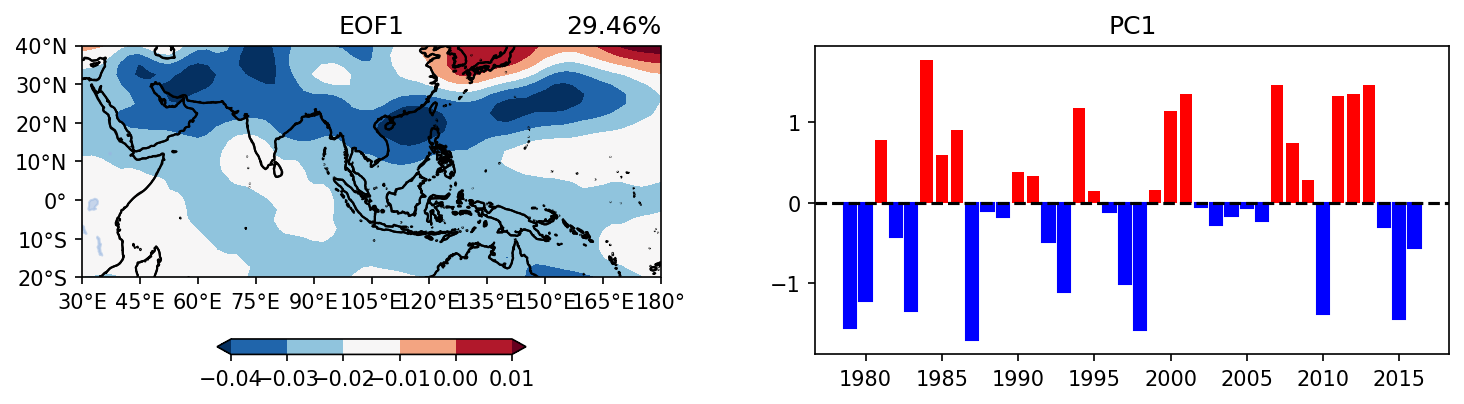

In [31]:
#开始绘图
fig=plt.figure(figsize=(12,6),dpi=150)#设置画布大小
ax1=fig.add_subplot(2,2,1,projection=ccrs.PlateCarree(central_longitude=120))#设置子图和投影
# 
leftlon, rightlon, lowerlat, upperlat = (30, 180, -20, 40)  # 画图范围
img_extent = [leftlon, rightlon, lowerlat, upperlat]
# 海岸线，50m精度
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
# 湖泊数据
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(leftlon, rightlon + 10, 15), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lowerlat, upperlat + 10, 10), crs=ccrs.PlateCarree())
ax1.set_title('EOF1')
ax1.set_title( '%.2f%%' % (hgt_var[0]*100), loc='right')
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

cf1 = ax1.contourf(lon, lat, hgt_eof[0,:,:], transform = ccrs.PlateCarree(),cmap = 'RdBu_r', extend = 'both')

cb1 = fig.colorbar(cf1, orientation='horizontal', fraction=0.05, shrink=1.5, pad = 0.2)

# c2 = ax1.contour(lon, lat, hgt_eof[0, :, :], 30, colors='k', extend='both', transform=ccrs.PlateCarree())
# # 给等值线上添加数值
# ax1.clabel(c2, fontsize=5, colors='k')
# 设置海岸线
ax1.coastlines()

#绘制pc1图
# year = np.linspace(1979, 2017, 39)
year = hgt_mean['year'].data
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('PC1')
# plt.ylim()
ax2.axhline(0, linestyle="--",c='k')
b=ax2.bar(year,hgt_pc[:,0] ,color='r')
for bar,height in zip(b,hgt_pc[:,0]):
    if height<0:
        bar.set(color='blue')
fig.show()